In [21]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [22]:
debussy_file = "musics/debussy.wav"
redhot_file = "musics/redhot.wav"
duke_file = "musics/duke.wav"

debussy, _ = librosa.load(debussy_file)
redhot, _ = librosa.load(redhot_file)
duke, _ = librosa.load(duke_file)

In [23]:
# Extract RMSE with librosa

FRAME_LENGTH = 1024
HOP_LENGTH = 512

rms_debussy = librosa.feature.rms(y=debussy, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
rms_redhot = librosa.feature.rms(y=redhot, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
rms_duke = librosa.feature.rms(y=duke, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]


In [24]:
rms_debussy

array([0.03491691, 0.05298564, 0.05961845, ..., 0.01386144, 0.01489561,
       0.01443748], dtype=float32)

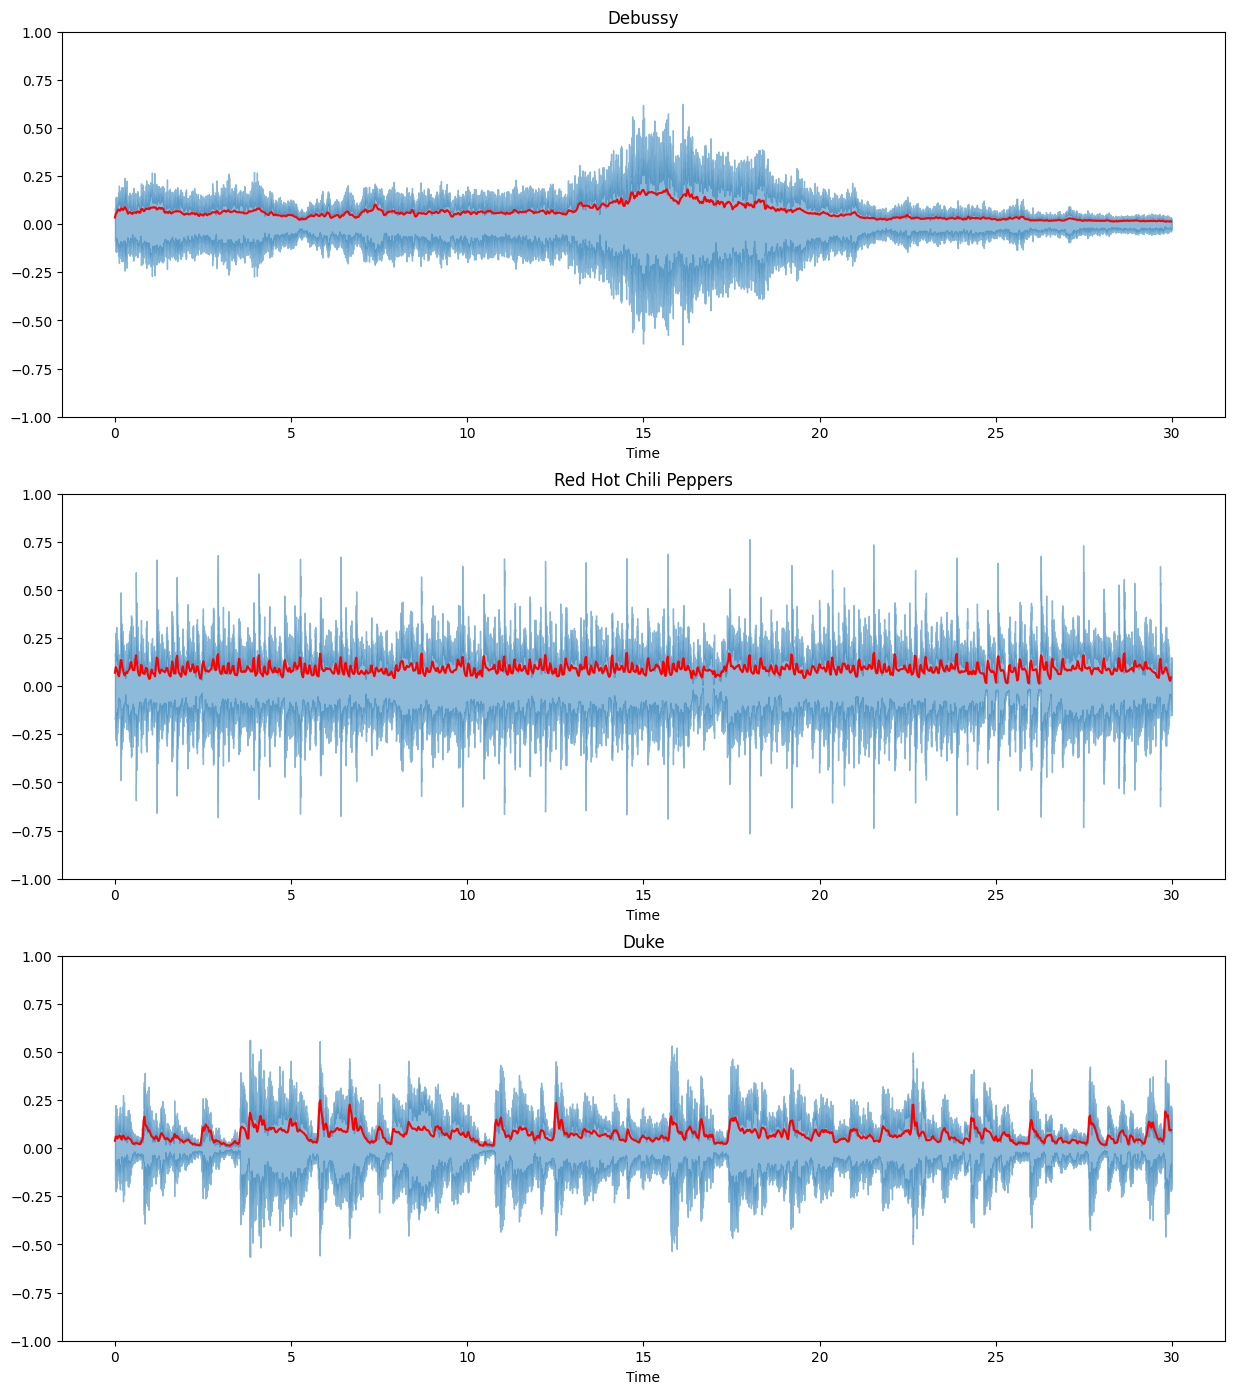

In [25]:
# Plot RMSE for all music pieces

# Visualize the amplitude envelope for all three audio signals

frames = range(0, rms_debussy.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, alpha=0.5)
plt.plot(t, rms_debussy, color='r')
plt.title("Debussy")
plt.ylim(-1, 1)

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, alpha=0.5)
plt.plot(t, rms_redhot, color='r')
plt.title("Red Hot Chili Peppers")
plt.ylim(-1, 1)

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, alpha=0.5)
plt.plot(t, rms_duke, color='r')
plt.title("Duke")
plt.ylim(-1, 1)

plt.show()

In [26]:
import numpy as np
# Defining RMSE function from scratch

def rms(signal, frame_length, hop_length):
    rmse = []
    for i in range(0, len(signal), hop_length):
        rmse_current_frame = np.sqrt(np.sum(signal[i:i+frame_length]**2) / frame_length)
        rmse.append(rmse_current_frame)
    return np.array(rmse)

In [27]:
rms_debussy_s = rms(debussy, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
rms_redhot_s = rms(redhot, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
rms_duke_s = rms(duke, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)

In [28]:
rms_debussy.shape

(1292,)

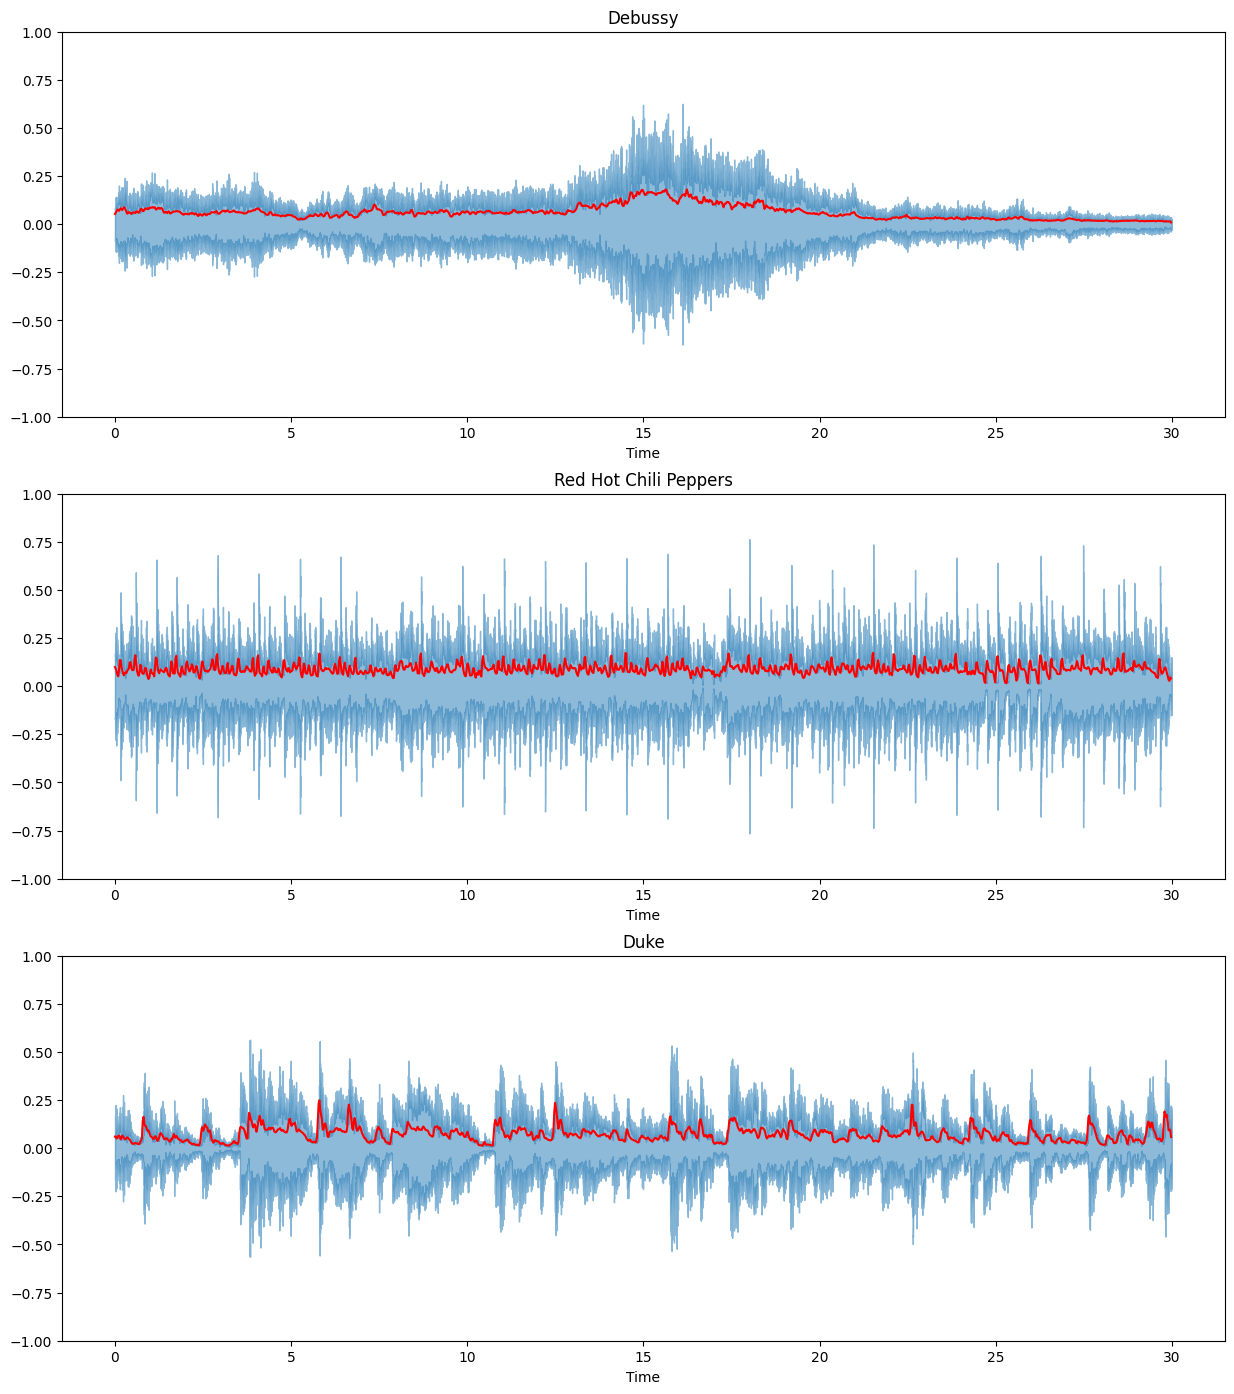

In [ ]:
# Plot RMSE for all music pieces

# Visualize the amplitude envelope for all three audio signals

frames = range(0, rms_debussy_s.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, alpha=0.5)
plt.plot(t, rms_debussy_s, color='y')
plt.title("Debussy")
plt.ylim(-1, 1)

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, alpha=0.5)
plt.plot(t, rms_redhot_s, color='y')
plt.title("Red Hot Chili Peppers")
plt.ylim(-1, 1)

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, alpha=0.5)
plt.plot(t, rms_duke_s, color='y')
plt.title("Duke")
plt.ylim(-1, 1)

plt.show()